# First Exploration of Flats Fits Files of Monocam
================================================================

- date of creation : Monday 30th 2016
- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS

Study images for LSST calibration group

In [3]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
#config InlineBackend.rc = {}
#config Backend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")  # default config obtained from astropy examples
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
from astropy.utils.data import download_file

In [5]:
from astropy.io import fits

In [6]:
import os

## 1) to define the input file for the images

In [7]:
path='/Users/dagoret-campagnesylvie/iraf/MonoCamMay2016/20160509'

In [8]:
filename='skyflats_01.fits'

In [9]:
flatnumber=1

In [10]:
flatnumberstr= '{0:02d}'.format(flatnumber)  # python >= 2.6
flatnumberstr

'01'

In [11]:
image_file=os.path.join(path,filename)

## 2) to inspect the header of the file

In [12]:
header=fits.getheader(image_file) # to retreive the header of the file
#fits.getheader(image_file)
#print header
#header

In this call, you see the number of images in the file:
- 16 images of size 544 x 2048 pixels
corresponding of :
- 8 columns of 544 pixels : 8 x 544 = 4352 pixels 
- 2 raws of 2048 pixels : 2 x 2048 = 4096 pixels

There is an excess of 4352-4096= 256 pixels along the columns.
It is possible there is 32 overscan slots.


In [13]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /Users/dagoret-campagnesylvie/iraf/MonoCamMay2016/20160509/skyflats_01.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     554   ()              
1                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
2                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
3                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
4                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
5                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
6                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
7                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
8                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
9                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
10               ImageHDU        33   (544, 2048)   int16 (resc

## 3) A view of the header

In [14]:
header=hdu_list[0].header
#header

#### 3.1 )notes on somes of the cards

##### which instrument and who

- HISTORY Created with RTS2 version 0.9.4 build on May  6 2016 18:01:35. : the controler for the CCD
- INSTRUME= '113-03  '           / name of the data acqusition instrument  : The EVL chip       
- TELESCOP= 'USNO 1.3m'          / name of the data acqusition telescope   : 1.3 m telescope       
- ORIGIN  = 'BNL     '           / organisation responsible for data    : the team

##### about the dates
- DATE    = '2016-05-10T01:07:55.503' / creation date  : Tango militay time zone (pacific west ) UTC -7 
- CTIME   =           1462842471 / exposure start (seconds since 1.1.1970)        
- USEC    =               926250 / exposure start micro seconds                   
- JD      =     2457518.54711806 / exposure JD                                    
- DATE-OBS= '2016-05-10T01:07:51.926' / start of exposure  : it should be in UTC

#### 3.2) extract the number of amplifiers

In [15]:
number_of_channels=header['CHAN']
print 'number_of_channels=', number_of_channels

number_of_channels= 16


#### 3.3) extract the time

In [16]:
import pandas as pd
from datetime import datetime, timedelta
from pytz import timezone
import pytz

In [17]:
timestr=header['DATE']
print timestr  # I don't know what to to from the .XXX after the second number
tzstr=timestr.split('.')[0]  # cut away the dot
print tzstr
datetime.strptime(tzstr, "%Y-%m-%dT%H:%M:%S")

2016-05-10T02:32:11.319
2016-05-10T02:32:11


datetime.datetime(2016, 5, 10, 2, 32, 11)

## 4) read one amplifier

In [18]:
numchan=1

In [19]:
image_data = hdu_list[numchan].data

In [20]:
image_data.shape

(2048, 544)

In [21]:

# better not to close the file here
#hdu_list.close() 

#### another way to read the image
But it is not interesting because it does not select the channel number

In [22]:
image_data = fits.getdata(image_file)
image_data_flat=image_data.flatten()
print(type(image_data))
print(image_data.shape)
themin=image_data.min()
themax=image_data.max()
print(themin,themax)

<type 'numpy.ndarray'>
(2048, 544)
(2624, 43602)


### 4.1) View the channel 1

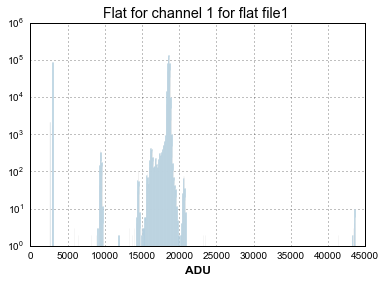

In [23]:
title='Flat for channel {} for flat file{} '.format(numchan,flatnumber)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(image_data_flat,bins=1000);
ax.set_title(title)
ax.set_xlabel('ADU')
ax.grid(True)
plt.yscale('log')
plt.show()

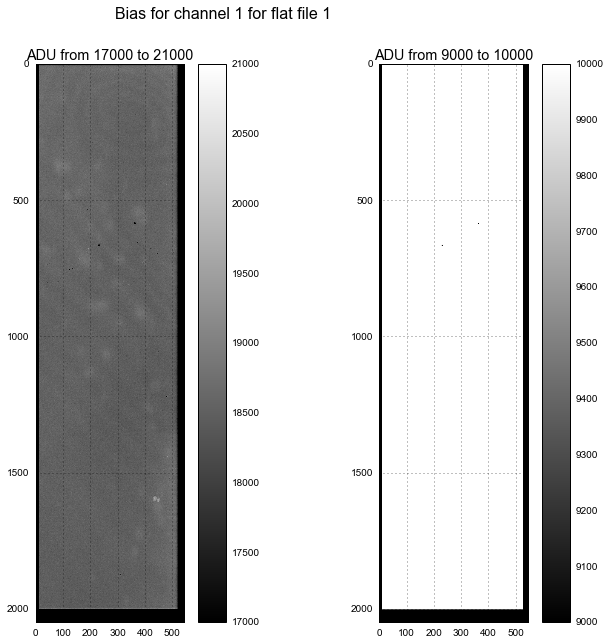

In [24]:
NX=2
NY=1
fig, axarr = plt.subplots(NY,NX,figsize=(10,10))
im1=axarr[0].imshow(image_data, cmap='gray',vmin=17000,vmax=21000)
axarr[0].set_title('ADU from 17000 to 21000')
plt.colorbar(im1, ax = axarr[0])

im2=axarr[1].imshow(image_data, cmap='gray',vmin=9000,vmax=10000)
axarr[1].set_title('ADU from 9000 to 10000')
plt.colorbar(im2, ax = axarr[1])

fig.subplots_adjust(right=1)

title='Bias for channel {} for flat file {} '.format(numchan,flatnumber)

plt.suptitle(title,size=16)
plt.show()


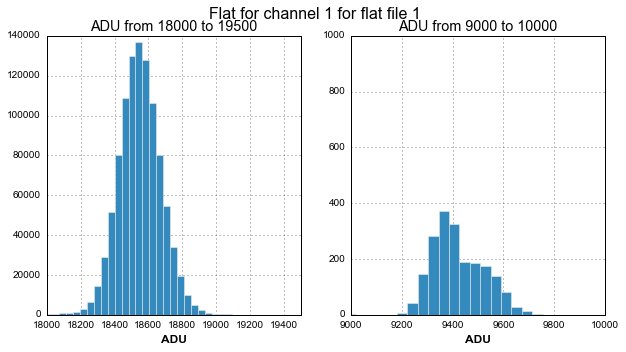

In [25]:
NX=2
NY=1
image_data_flat=image_data.flatten()

fig, axarr = plt.subplots(NY,NX,figsize=(10,5))

axarr[0].hist(image_data_flat,bins=1000);
axarr[0].set_title('ADU from 18000 to 19500')
axarr[0].set_xlim(18000,19500)
axarr[0].set_xlabel('ADU')


axarr[1].hist(image_data_flat,bins=1000);
axarr[1].set_title('ADU from 9000 to 10000')
axarr[1].set_xlim(9000,10000)
axarr[1].set_ylim(0,1000)
axarr[1].set_xlabel('ADU')

title='Flat for channel {} for flat file {} '.format(numchan,flatnumber)

plt.suptitle(title,size=16)
plt.show()



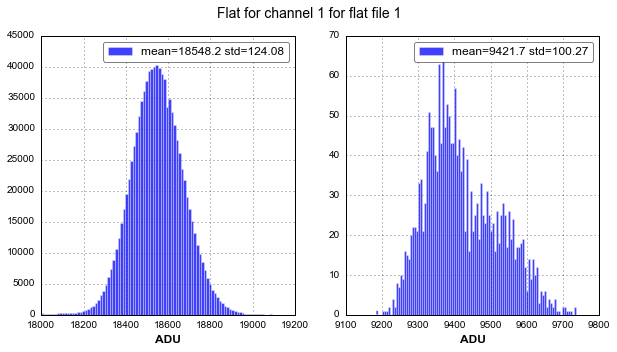

In [26]:
aducut1=9000
aducut2=9800

aducut3=18000
aducut4=19200

highvalue = image_data_flat[np.where( np.logical_and(image_data_flat> aducut3, image_data_flat< aducut4)) ]
lowvalue = image_data_flat[np.where( np.logical_and(image_data_flat> aducut1,image_data_flat< aducut2)) ]

hvmean=highvalue.mean()
hvrms=highvalue.std()
hvtitle='mean={:5.1f} std={:4.2f}'.format(hvmean,hvrms)

lvmean=lowvalue.mean()
lvrms=lowvalue.std()
lvtitle='mean={:5.1f} std={:4.2f}'.format(lvmean,lvrms)

NX=2
NY=1
image_data_flat=image_data.flatten()

fig, axarr = plt.subplots(NY,NX,figsize=(10,5))

axarr[0].hist(highvalue,bins=100,facecolor='blue', alpha=0.75,label=hvtitle);
#axarr[0].set_title(hvtitle)
axarr[0].set_xlabel('ADU')
axarr[0].legend(loc='best')

axarr[1].hist(lowvalue,bins=100,facecolor='blue', alpha=0.75,label=lvtitle);
#axarr[1].set_title(lvtitle)
axarr[1].set_xlabel('ADU')
axarr[1].legend(loc='best')

title='Flat for channel {} for flat file {} '.format(numchan,flatnumber)

plt.suptitle(title,size=14)
plt.show()


In [27]:
aducut1=9000
aducut2=9800

aducut3=18000
aducut4=19200

aducut5=5000

row_hv,col_hv = np.where( np.logical_and(image_data> aducut3, image_data< aducut4)) 
row_lv,col_lv = np.where( np.logical_and(image_data> aducut1,image_data< aducut2)) 
row_vvl,col_vvl = np.where(image_data< aducut5) 

In [28]:
print 'row_hv = ',row_hv
print 'col_hv = ',col_hv
print 'row_lv = ',row_lv
print 'col_lv = ',col_lv
print 'row_vvl = ',row_vvl
print 'col_vvl = ',col_vvl

row_hv =  [   0    0    0 ..., 1999 2000 2000]
col_hv =  [ 59  64  65 ..., 517 517 518]
row_lv =  [   5    6    7 ..., 1995 1996 1997]
col_lv =  [521 521 521 ..., 521 521 521]
row_vvl =  [   0    0    0 ..., 2047 2047 2047]
col_vvl =  [522 523 524 ..., 541 542 543]


2048
544


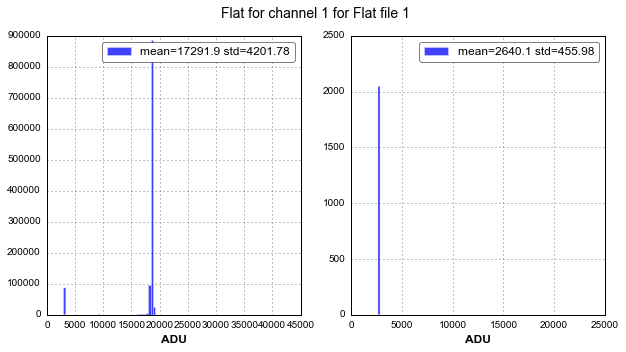

In [29]:
nrow,ncol =image_data.shape
print nrow
print ncol

firstcol = image_data[:,0]
othercol = image_data[:,1:ncol]

lowvalue = firstcol.flatten()
highvalue = othercol.flatten()

hvmean=highvalue.mean()
hvrms=highvalue.std()
hvtitle='mean={:5.1f} std={:4.2f}'.format(hvmean,hvrms)

lvmean=lowvalue.mean()
lvrms=lowvalue.std()
lvtitle='mean={:5.1f} std={:4.2f}'.format(lvmean,lvrms)

NX=2
NY=1
image_data_flat=image_data.flatten()

fig, axarr = plt.subplots(NY,NX,figsize=(10,5))

axarr[0].hist(highvalue,bins=100,facecolor='blue', alpha=0.75,label=hvtitle);
#axarr[0].set_title(hvtitle)
axarr[0].set_xlabel('ADU')
axarr[0].legend(loc='best')

axarr[1].hist(lowvalue,bins=100,facecolor='blue', alpha=0.75,label=lvtitle);
#axarr[1].set_title(lvtitle)
axarr[1].set_xlabel('ADU')
axarr[1].legend(loc='best')

title='Flat for channel {} for Flat file {} '.format(numchan,flatnumber)

plt.suptitle(title,size=14)
plt.show()


### Pointing Anomalies

In [30]:
ix,iy=np.where(image_data<2700)
print('row number where there is the anomaly',ix)
print ('column where there is the anomaly',iy)
print ('the values of the bias',image_data[ix,iy])

('row number where there is the anomaly', array([   1,    2,    3, ..., 2045, 2046, 2047]))
('column where there is the anomaly', array([0, 0, 0, ..., 0, 0, 0]))
('the values of the bias', array([2629, 2633, 2630, ..., 2630, 2630, 2630], dtype=uint16))


In [31]:
def ShowImagesSet(path,filename):
    '''
    Shows the whole set of CCD images
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
    image_file=os.path.join(path,filename) # make the full filename    
    hdu_list = fits.open(image_file)       # open the file
    #hdu_list.info()	 # to know the composition of the files (header+images)		
    header=hdu_list[0].header           # retrieve the header
    number_of_channels=header['CHAN']   # number of channels in the CCD
    
    NX=8 # number of images along the horizontal axis
    NY=2 # number of images along the vertical axis
    f, axarr = plt.subplots(NY,NX,sharex='col', sharey='row',figsize=(15,15)) # figure organisation
    #f, axarr = plt.subplots(NX,NY,sharex=True, sharey=True,figsize=(20,20))
    f.subplots_adjust(hspace=0.05,wspace=0.05)

    for index in range(0,number_of_channels,1):  
        ix=index%8
        iy=index/8
        image_data = hdu_list[index+1].data
        im=axarr[iy,ix].imshow(image_data, cmap='gray')  # plot the image
        #plt.colorbar(im, orientation='horizontal')
        plottitle='channel {}'.format(index+1)
        axarr[iy,ix].set_title(plottitle)
    hdu_list.close()
    title='Flat for flat file {} '.format(flatnumber)
    plt.suptitle(title,size=16)

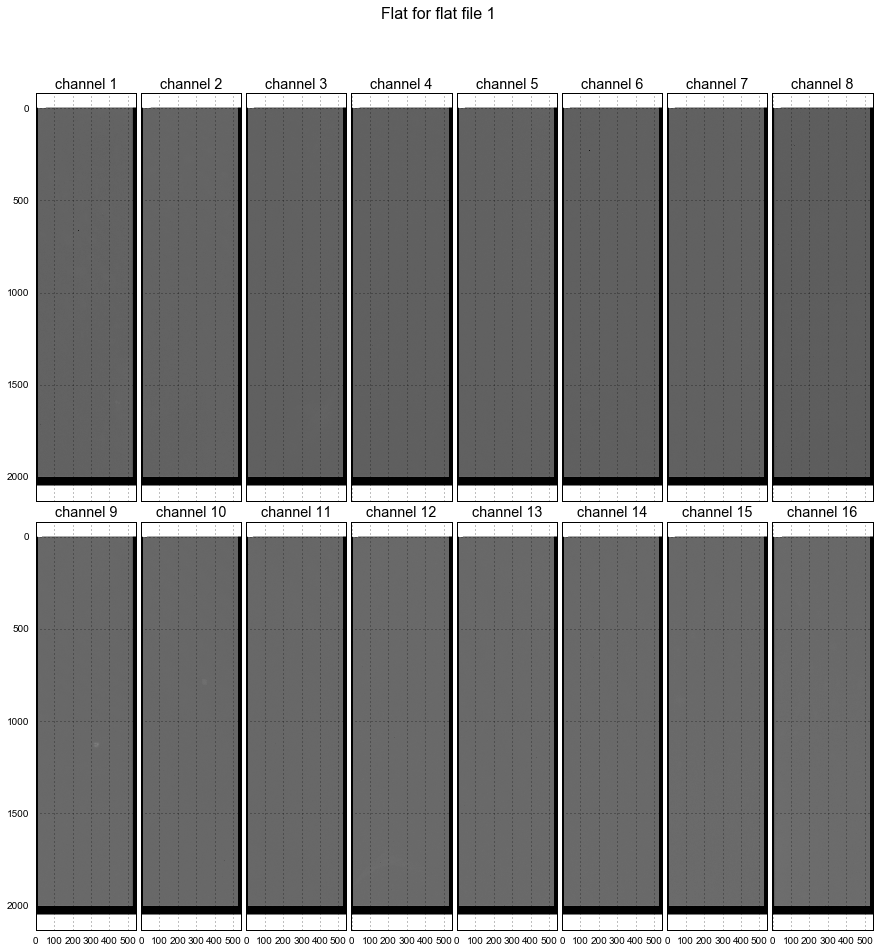

In [32]:
ShowImagesSet(path,image_file)

In [33]:
def ShowHistoSet(path,filename):
    '''
    Shows the whole set of CCD histograms
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
    image_file=os.path.join(path,filename) # make the full filename    
    hdu_list = fits.open(image_file)       # open the file
    #hdu_list.info()	 # to know the composition of the files (header+images)		
    header=hdu_list[0].header           # retrieve the header
    number_of_channels=header['CHAN']   # number of channels in the CCD
    
    NX=4 # number of images along the horizontal axis
    NY=4 # number of images along the vertical axis
    f, axarr = plt.subplots(NY,NX,figsize=(20,20)) # figure organisation
    #f, axarr = plt.subplots(NX,NY,sharex=True, sharey=True,figsize=(20,20))
    f.subplots_adjust(hspace=0.5,wspace=0.5)

    for index in range(0,number_of_channels,1):  
        ix=index%4
        iy=index/4
        image_data = hdu_list[index+1].data
        data=image_data.flatten()
        axarr[iy,ix].hist(data,bins=500,facecolor='blue', alpha=0.75,log=True)  # plot the image
        plottitle='channel {}'.format(index+1)
        axarr[iy,ix].set_title(plottitle)
        axarr[iy,ix].set_xlabel('ADU')
        axarr[iy,ix].grid(True)
        #axarr[iy,ix].set_yscale('log')
        
    hdu_list.close()
    plt.yscale('log')
    title='Flat for flat file {} '.format(flatnumber)
    plt.suptitle(title,size=16)

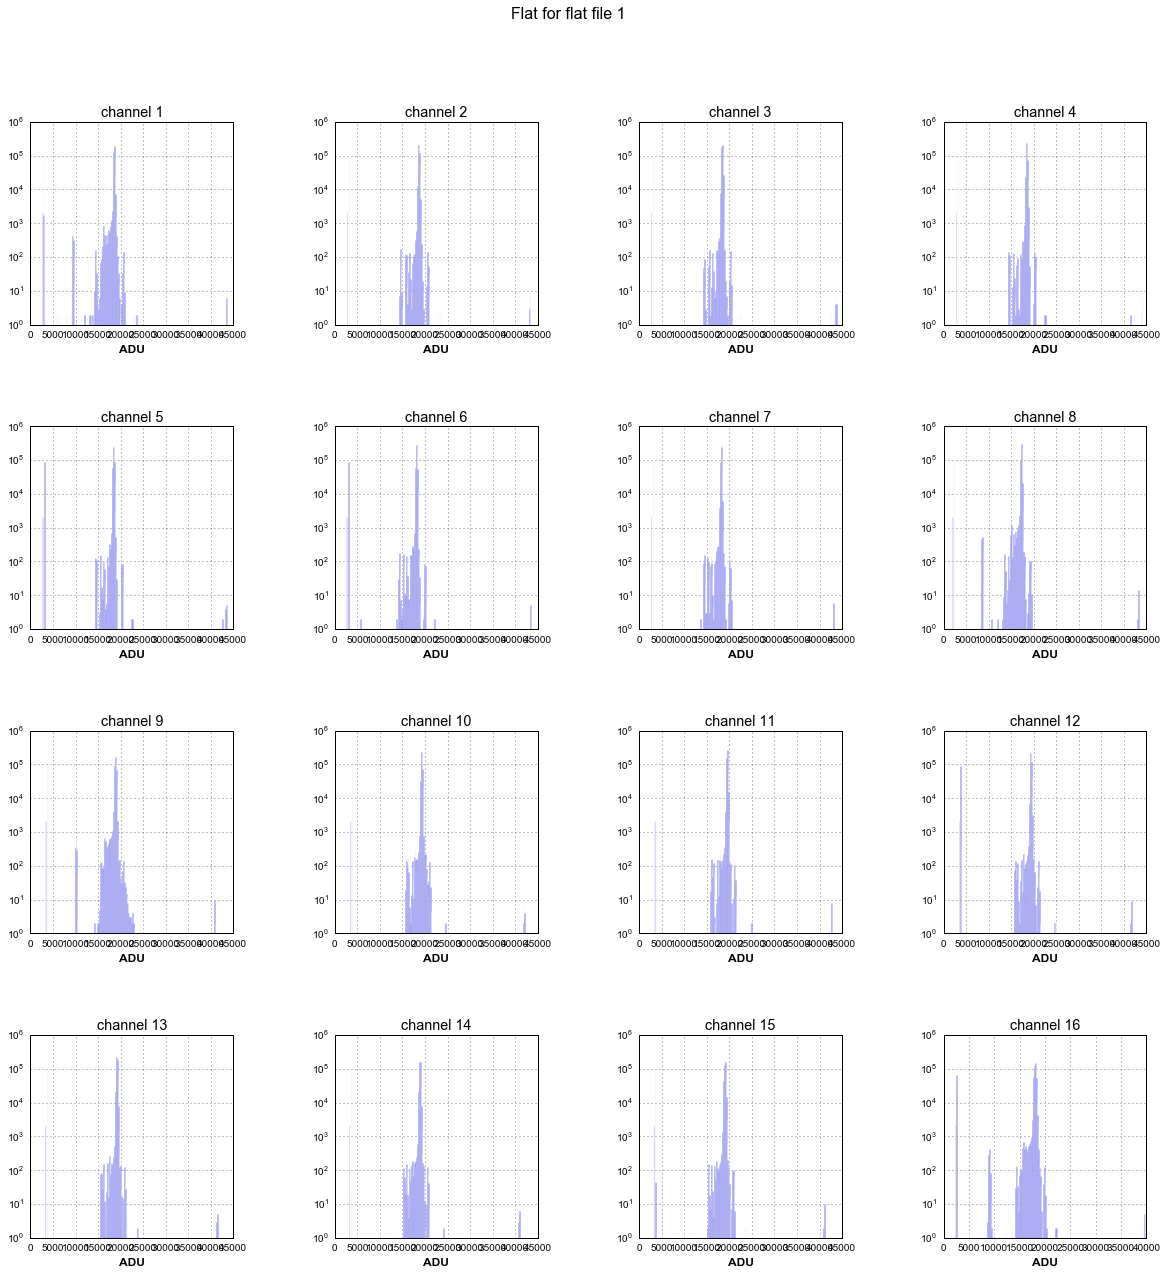

In [34]:
ShowHistoSet(path,image_file)

In [40]:
def ShowHistoSetAxis(path,filename,ax=0):
    '''
    Shows the whole set of CCD histograms
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
    image_file=os.path.join(path,filename) # make the full filename    
    hdu_list = fits.open(image_file)       # open the file
    #hdu_list.info()	 # to know the composition of the files (header+images)		
    header=hdu_list[0].header           # retrieve the header
    number_of_channels=header['CHAN']   # number of channels in the CCD
    
    NX=4 # number of images along the horizontal axis
    NY=4 # number of images along the vertical axis
    f, axarr = plt.subplots(NY,NX,figsize=(20,20)) # figure organisation
    #f, axarr = plt.subplots(NX,NY,sharex=True, sharey=True,figsize=(20,20))
    f.subplots_adjust(hspace=0.5,wspace=0.5)

    for index in range(0,number_of_channels,1):  
        ix=index%4
        iy=index/4
        image_data = hdu_list[index+1].data
        data=np.mean(image_data,axis=ax)
        axarr[iy,ix].plot(data)  # plot the image
        plottitle='channel {}'.format(index+1)
        axarr[iy,ix].set_title(plottitle)
        axarr[iy,ix].set_xlabel('ADU')
        axarr[iy,ix].grid(True)
        #axarr[iy,ix].set_yscale('log')
        
    hdu_list.close()
    #plt.yscale('log')
    title='Flat for flat file {} axis {} '.format(flatnumber,ax)
    plt.suptitle(title,size=16)

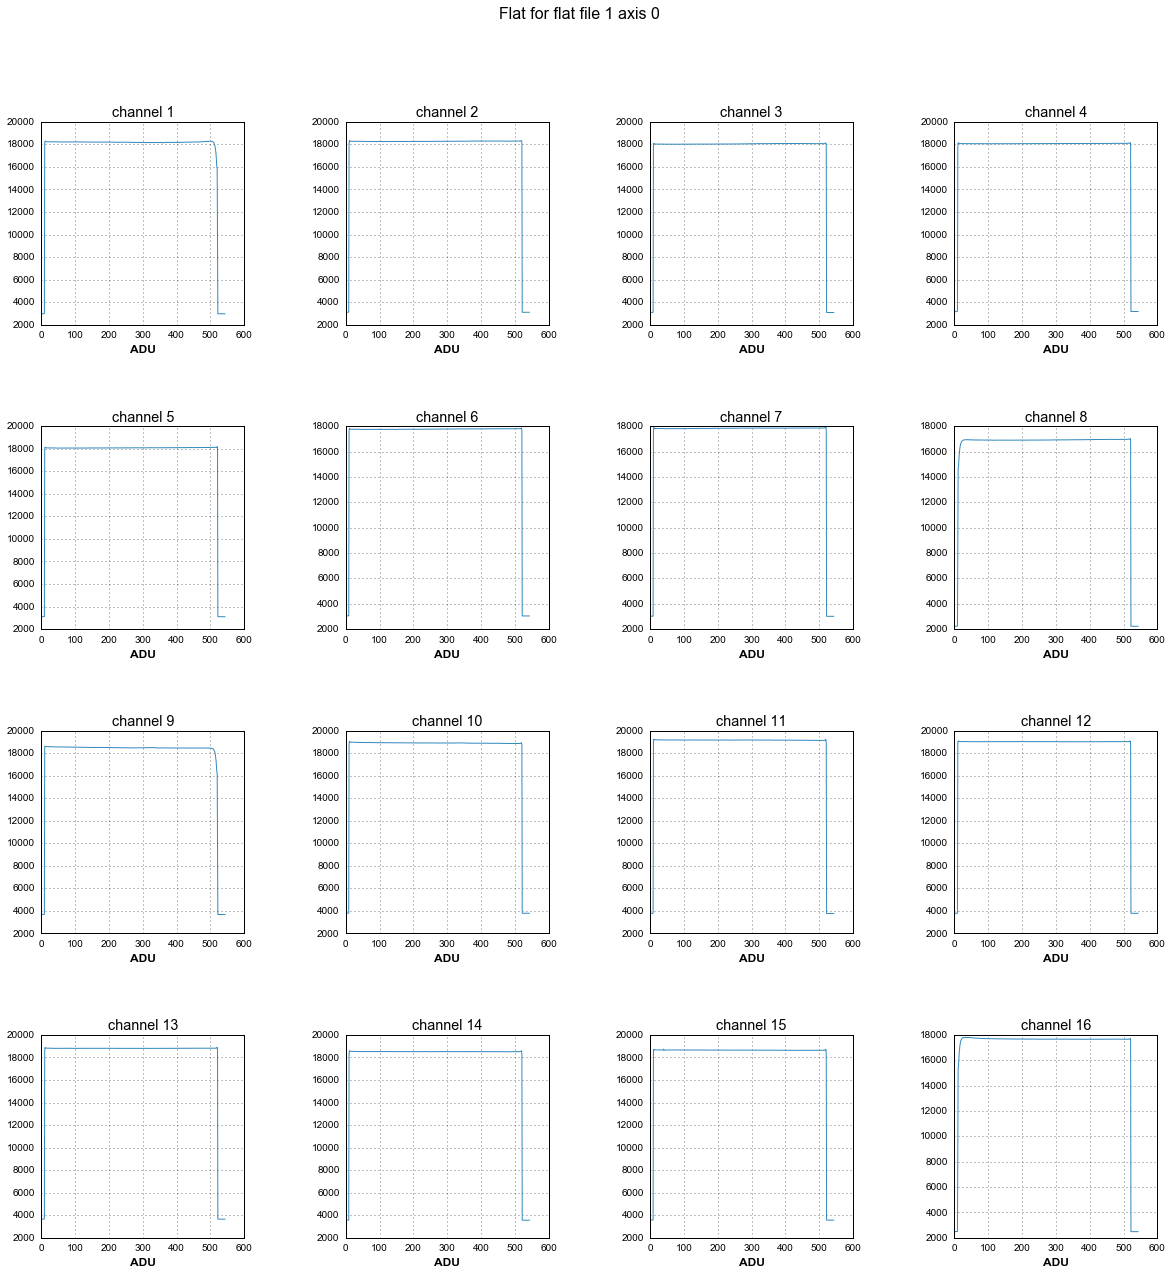

In [41]:
ShowHistoSetAxis(path,image_file)

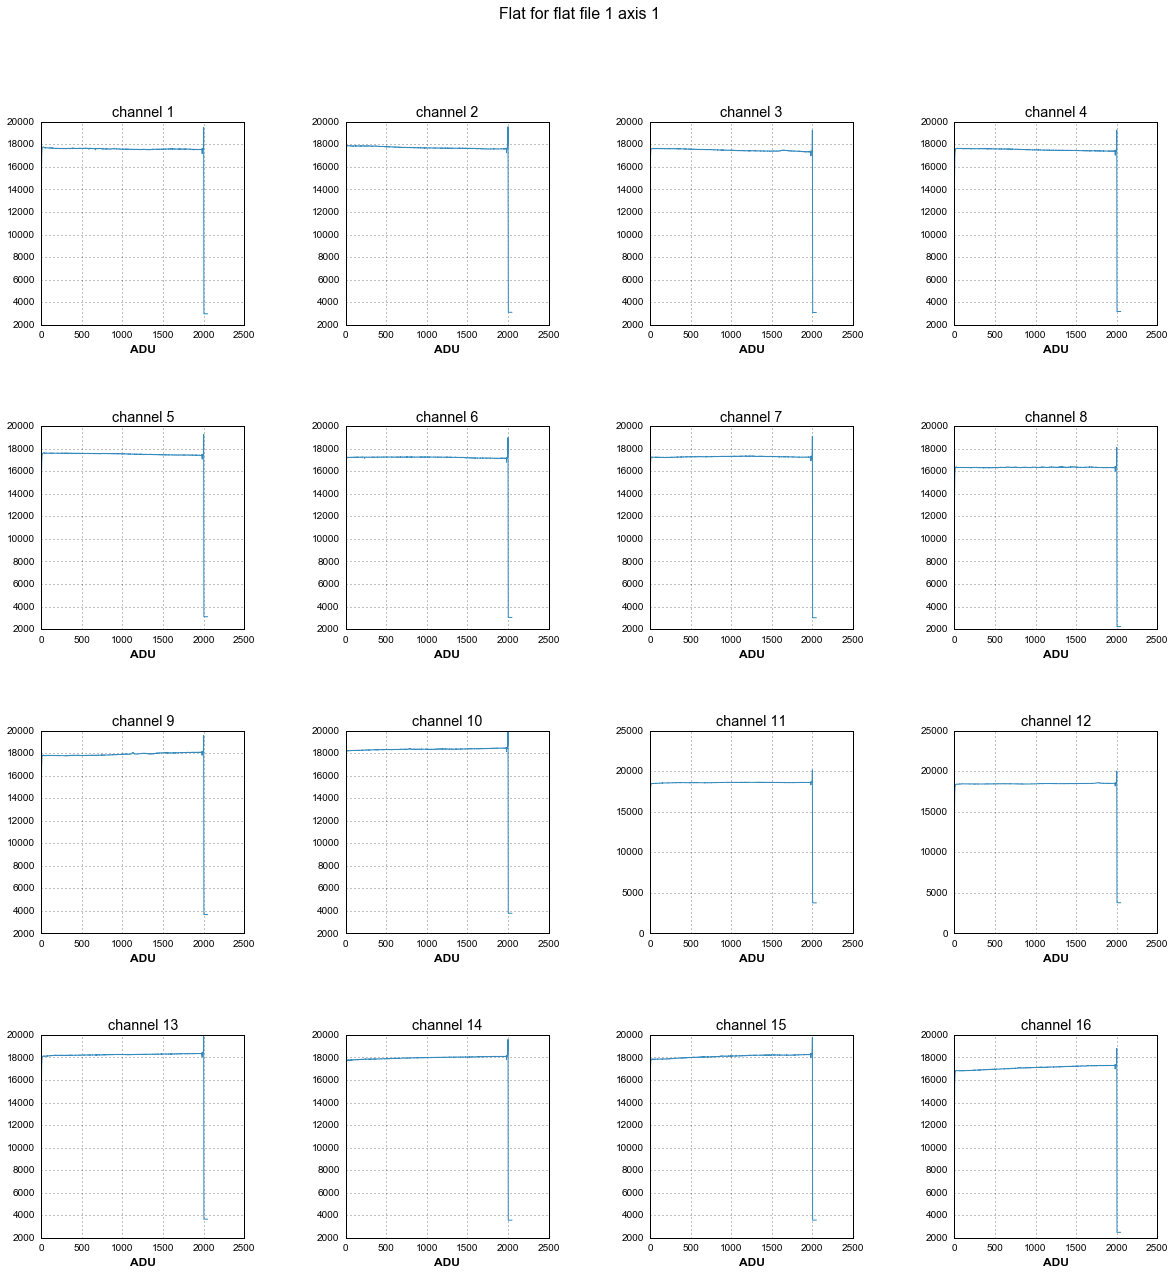

In [42]:
ShowHistoSetAxis(path,image_file,ax=1)

In [63]:
def ShowHistoSumAxis(path,filename,ax=0):
    '''
    Shows the whole set of CCD histograms
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
    image_file=os.path.join(path,filename) # make the full filename    
    hdu_list = fits.open(image_file)       # open the file
    #hdu_list.info()	 # to know the composition of the files (header+images)		
    header=hdu_list[0].header           # retrieve the header
    number_of_channels=header['CHAN']   # number of channels in the CCD
    
    NX=1 # number of images along the horizontal axis
    NY=1 # number of images along the vertical axis
    f, axarr = plt.subplots(NY,NX,figsize=(20,6)) # figure organisation

    for index in range(0,number_of_channels,1):  
        
        image_data = hdu_list[index+1].data
        data=np.mean(image_data,axis=ax)
        plabel='channel {}'.format(index+1)
        plt.plot(np.arange(data.shape[0]),data,label=plabel)  # plot the image
    

        
    hdu_list.close()
    plt.legend(loc='best')
    title='Flat for flat file {} axis {} '.format(flatnumber,ax)
    plt.suptitle(title,size=16)

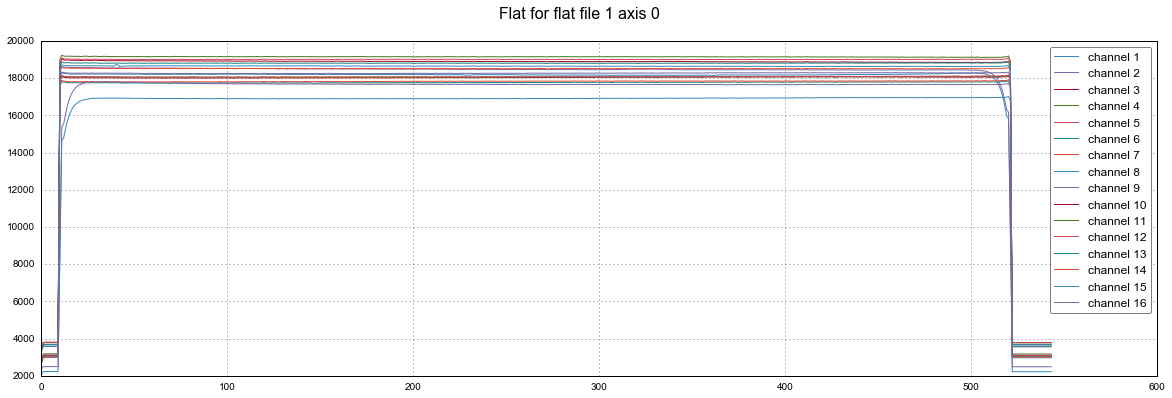

In [64]:
ShowHistoSumAxis(path,image_file)

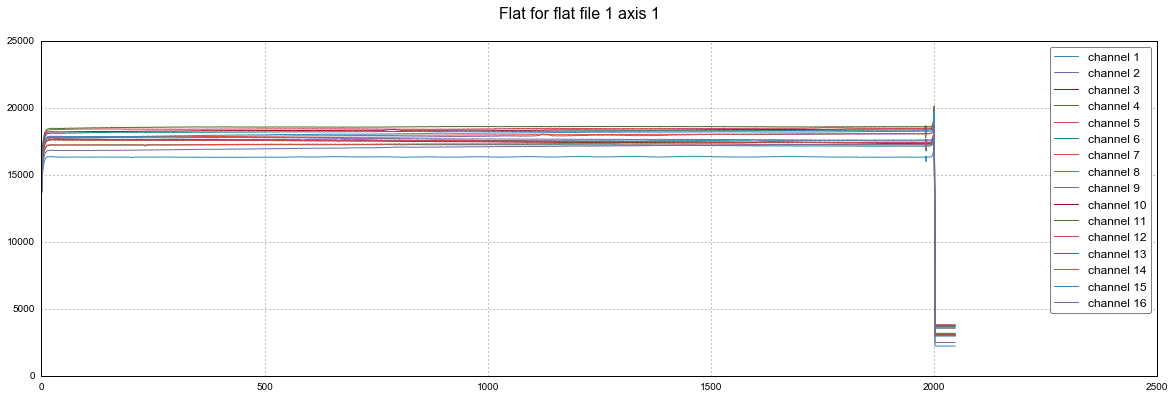

In [65]:
ShowHistoSumAxis(path,image_file,ax=1)